# 6-8 波士頓房價預測

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### `scikit-learn` 套件

讀入我們學過的 `LinearRegression` 做線性回歸, 還有 `train_test_split` 分訓練、測試資料。

## `scikit-learn` 真實世界數據

`scikit-learn` 內建一些真實世界的數據, 可以讓你玩玩, 他們稱做 "Toy Datasets"。有哪些可以參考 [scikit-learn 官網](http://scikit-learn.org/stable/datasets/index.html)的說明。

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### 讀入 boston 房價數據

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

## 資料裡到底有什麼

#### features

你可以用 `feature_names` 看到數據中所有的 features。你才發現原來有 13 個 features!

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = boston.data
Y = boston.target

In [7]:
len(X)

506

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=87)   # random_state 讓亂數抽取的數據是一樣的

In [9]:
regr = LinearRegression()

In [10]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_predict = regr.predict(x_test)

Text(0, 0.5, 'Predicted Price')

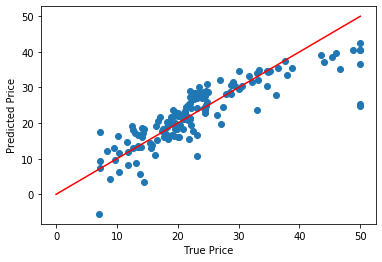

In [12]:
plt.scatter(y_test, y_predict)
plt.plot([0,50],[0,50],'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

#### 解釋數據內容

你也可以用

``` py
print(boston.DESCR)
```

看看完整的解釋。

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 6-9 畫出各 feature 和輸出關係

#### [小技巧] 善用 `enumerate`

In [14]:
L = ['a', 'b', 'c']

In [15]:
for i in L:
    print(i)

a
b
c


In [16]:
for i in range(3):
    print(i+1, L[i])

1 a
2 b
3 c


In [17]:
# enumerate()：把元素個數與名稱算出來
list(enumerate(L))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [18]:
# 很高級的 enumerate用法：enumerate(list變數)
# enumerate會把 list的 index和 list的 item包成一個 tuple,然後再把每個 tuple包成按 index順序的 tuple
for i in enumerate(L):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [19]:
for i, s in enumerate(L):
    print(i+1, s)

1 a
2 b
3 c


#### [小技巧] 畫多個圖

In [20]:
x = np.linspace(-10,10,200)

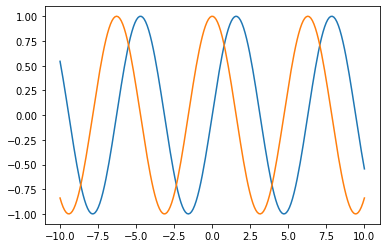

In [21]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

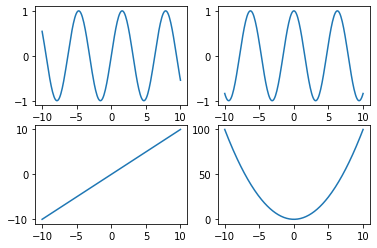

In [22]:
plt.subplot(2,2,1)   # 圖一
plt.plot(x, np.sin(x))

plt.subplot(2,2,2)   # 圖二
plt.plot(x, np.cos(x))

plt.subplot(2,2,3)   # 圖三
plt.plot(x, x)

plt.subplot(2,2,4)   # 圖四
plt.plot(x, x**2)

#### 炫炫的畫出個別參數和 target 關係



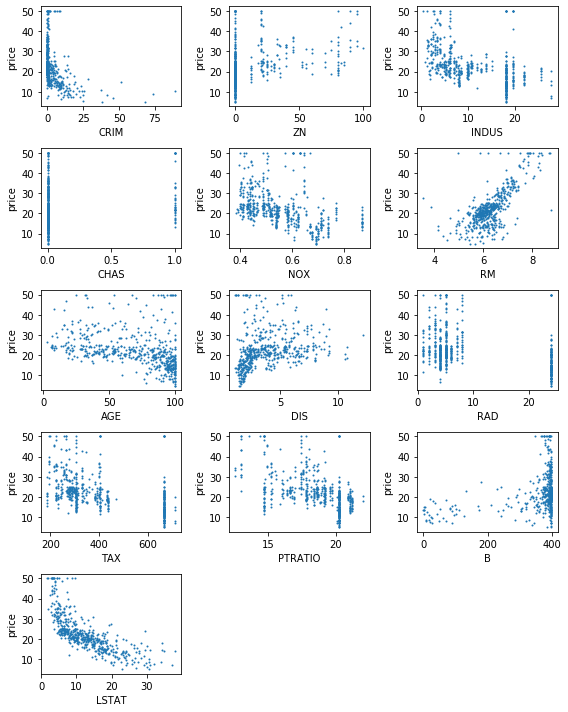

In [23]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel("price")
    plt.xlabel(feature)
    plt.tight_layout()